In [1]:
import pandas as pd
import numpy as np
import datetime

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')


from pandas.plotting import scatter_matrix



from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import r2_score, log_loss
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from model_functions import crossVal



from sklearn.metrics import accuracy_score , confusion_matrix
from sklearn.metrics import log_loss, make_scorer




from sklearn.pipeline import Pipeline
from regression_tools.dftransformers import (
    ColumnSelector, Identity,
    FeatureUnion, MapFeature,
    StandardScaler)


from data_cleaning_functions import *
from model_functions import *
import pandas as pd







# Load and Transform Raw Data

In [2]:
load_csv('data/pre_ti_matches.csv') # load the pretournament-season CSV downloaded from open Dota

extract_match_data('data/match_ids') # extract match id column from CSV

drop_na('data/full_data.csv') # drop matches with Nan values

find_team_avg('data/full_data.csv') # find each individual teams averages for pre main event matches

calculate_team_differences('data/team_averages.csv','data/full_data.csv') #Calculate the differences in average for each match.



3962882047
Could not find data for  3962882047
3962997393
Could not find data for  3962997393
3963082795
Could not find data for  3963082795
3963141136
Could not find data for  3963141136
3963175050
Could not find data for  3963175050
3963261456
Could not find data for  3963261456
3963365795
Could not find data for  3963365795
3963510721
Could not find data for  3963510721
3963622811
Could not find data for  3963622811
3963695407
Could not find data for  3963695407
3963748898
Could not find data for  3963748898
3963766315
Could not find data for  3963766315
3963833718
Could not find data for  3963833718
3963951879
Could not find data for  3963951879
3964015955
Could not find data for  3964015955
3964347005
Could not find data for  3964347005
3964420417
Could not find data for  3964420417
3964501224
Could not find data for  3964501224
3964587511
Could not find data for  3964587511
3964610577
Could not find data for  3964610577
3964678461
Could not find data for  3964678461
3964779866
Co

3979702213
3979786666
3979824996
3981106180
3981231091
3981456050
3981626536
3981742278
3981835685
3981901697
3983421015
3983519293
3983657558
3983737782
3984741758
3984899274
3985055564
3985183442
3985276731
3985347818
3985420785
3985484900
3986737263
3986808819
3986953827
3987055543
3987125391
3988046333
3988166715
3988359156
3988454196
3988532657
3988642448
3988738002
3989754925
3989888060
3990099363
3990178856
3990313897
3990376511
3991761839
3991902394
3992052632
3992148233
3993624777
3993721704
3993809789
3993919863
3993995989
3995186500
3995327439
3995509337
3995620207
3995710363
3996855176
3996994359
3997139769
3997260056
3997392371
3998482464
3998672773
3998878020
3998952076
3999087077
3999140651
3999201727
4061660411
4061662358
4061671194
4061694810
4061721528
4061742840
4061745637
4061766981
4061802430
4061804100
4061815647
4061848287
4061858332
4061867364
4061880066
4061903681
4061921764
4061922574
4061924528
4061952570
4061971770
4061977166
4061984521
4062010988
4062016236

/home/jonathan/Dota-2-Predicator/Pre Tournament Base Models/data_cleaning_functions.py:239: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  matchup_data['diff_assists'] = 0
/home/jonathan/Dota-2-Predicator/Pre Tournament Base Models/data_cleaning_functions.py:240: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  matchup_data['diff_denies'] = 0
/home/jonathan/Dota-2-Predicator/Pre Tournament Base Models/data_cleaning_functions.py:241: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

0  of  212


/home/jonathan/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


1  of  212
2  of  212
3  of  212
4  of  212
5  of  212
6  of  212
7  of  212
8  of  212
9  of  212
10  of  212
11  of  212
12  of  212
13  of  212
14  of  212
15  of  212
16  of  212
17  of  212
18  of  212
19  of  212
20  of  212
21  of  212
22  of  212
23  of  212
24  of  212
25  of  212
26  of  212
27  of  212
28  of  212
29  of  212
30  of  212
31  of  212
32  of  212
33  of  212
34  of  212
35  of  212
36  of  212
37  of  212
38  of  212
39  of  212
40  of  212
41  of  212
42  of  212
43  of  212
44  of  212
45  of  212
46  of  212
47  of  212
48  of  212
49  of  212
50  of  212
51  of  212
52  of  212
53  of  212
54  of  212
55  of  212
56  of  212
57  of  212
58  of  212
59  of  212
60  of  212
61  of  212
62  of  212
63  of  212
64  of  212
65  of  212
66  of  212
67  of  212
68  of  212
69  of  212
70  of  212
71  of  212
72  of  212
73  of  212
74  of  212
75  of  212
76  of  212
77  of  212
78  of  212
79  of  212
80  of  212
81  of  212
82  of  212
83  of  212
84  of  212
8

# Custom Cross Validation Function

# Load Complete Data Frame & Train Test Split

In [3]:
matchup_data = pd.read_csv("data/matchup_data.csv")

X = matchup_data[['diff_assists', 'diff_denies', 'diff_first_blood', 'diff_gpm', 'diff_healing', 'diff_hero_damage', 'diff_kills', 'diff_last_hits', 'diff_match_duration', 'diff_total_levels', 'diff_tower_damage', 'diff_xpm']]
#X = matchup_data[['diff_assists', 'diff_denies','diff_gpm', 'diff_healing', 'diff_hero_damage', 'diff_kills', 'diff_last_hits', 'diff_total_levels', 'diff_tower_damage', 'diff_xpm']]
y = matchup_data.radiant_winner

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1)




# Quick EDA

In [4]:
import pandas as pd
import seaborn as sns
df=pd.read_csv('data/matchup_data.csv')
df


,match_id,Radiant,Dire,radiant_winner,diff_assists,diff_denies,diff_first_blood,diff_gpm,diff_healing,diff_hero_damage,diff_kills,diff_last_hits,diff_match_duration,diff_total_levels,diff_tower_damage,diff_xpm
0,3979184158,MEGA-LADA E-sports,No Bounty Hunter,1,1.688889,-2.644444,45.133333,-71.111111,-3642.933333,-4110.955556,1.044444,-117.133333,-30.844444,-6.888889,-1318.755556,-184.800000
1,3979298911,No Bounty Hunter,MEGA-LADA E-sports,1,-1.688889,2.644444,-45.133333,71.111111,3642.933333,4110.955556,-1.044444,117.133333,30.844444,6.888889,1318.755556,184.800000
2,3979399789,No Bounty Hunter,MEGA-LADA E-sports,1,-1.688889,2.644444,-45.133333,71.111111,3642.933333,4110.955556,-1.044444,117.133333,30.844444,6.888889,1318.755556,184.800000
3,3979544791,LeftOneTV,Team Empire,1,23.878788,7.621212,-56.333333,220.863636,2539.500000,13913.181818,10.757576,-40.318182,-102.242424,8.545455,944.454545,444.393939
4,3979547233,Vega Squadron,•,0,0.857143,13.785714,44.714286,246.785714,-2038.571429,3118.142857,1.714286,222.000000,212.214286,3.285714,4269.714286,65.357143
5,3979665820,•,Vega Squadron,0,-0.857143,-13.785714,-44.714286,-246.785714,2038.571429,-3118.142857,-1.714286,-222.000000,-212.214286,-3.285714,-4269.714286,-65.357143
6,3979702213,Team Empire,LeftOneTV,1,-23.878788,-7.621212,56.333333,-220.863636,-2539.500000,-13913.181818,-10.757576,40.318182,102.242424,-8.545455,-944.454545,-444.393939
7,3979786666,Vega Squadron,•,0,0.857143,13.785714,44.714286,246.785714,-2038.571429,3118.142857,1.714286,222.000000,212.214286,3.285714,4269.714286,65.357143
8,3979824996,LeftOneTV,Team Empire,1,23.878788,7.621212,-56.333333,220.863636,2539.500000,13913.181818,10.757576,-40.318182,-102.242424,8.545455,944.454545,444.393939
9,3981106180,20 min afk les,Team Singularity,0,9.750000,-6.666667,47.625000,186.208333,4070.500000,11762.666667,2.958333,-39.041667,49.875000,6.666667,2023.875000,109.916667


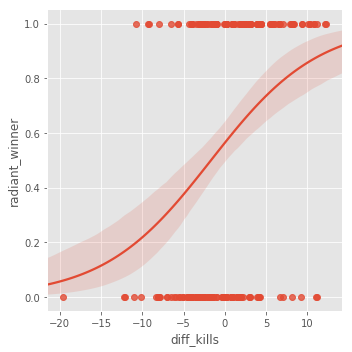

In [5]:
g = sns.lmplot(x="diff_kills", y="radiant_winner", data=df, logistic=True)

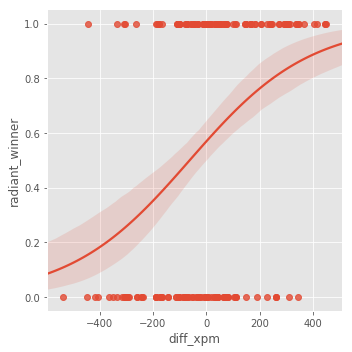

In [6]:
g = sns.lmplot(x="diff_xpm", y="radiant_winner", data=df, logistic=True)

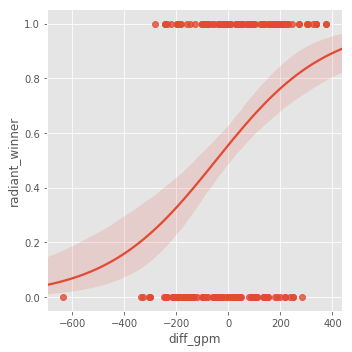

In [7]:
g = sns.lmplot(x="diff_gpm", y="radiant_winner", data=df, logistic=True)

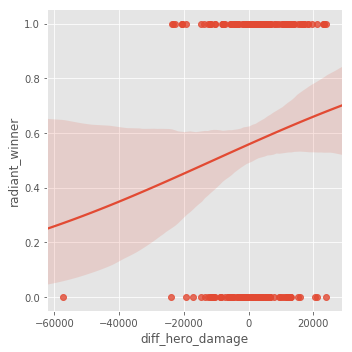

In [8]:
g = sns.lmplot(x="diff_hero_damage", y="radiant_winner", data=df, logistic=True)

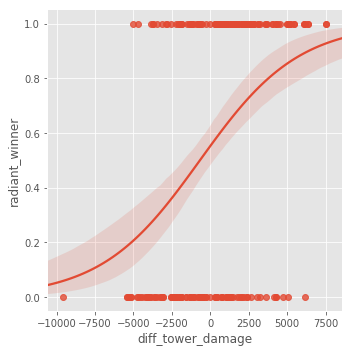

In [9]:
g = sns.lmplot(x="diff_tower_damage", y="radiant_winner", data=df, logistic=True)


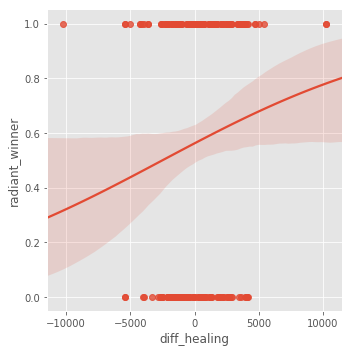

In [10]:
g = sns.lmplot(x="diff_healing", y="radiant_winner", data=df, logistic=True)

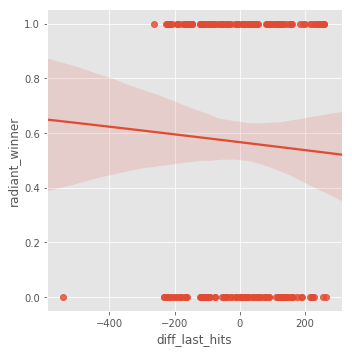

In [11]:
g = sns.lmplot(x="diff_last_hits", y="radiant_winner", data=df, logistic=True)

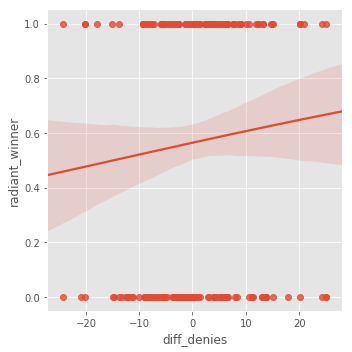

In [12]:
g = sns.lmplot(x="diff_denies", y="radiant_winner", data=df, logistic=True)

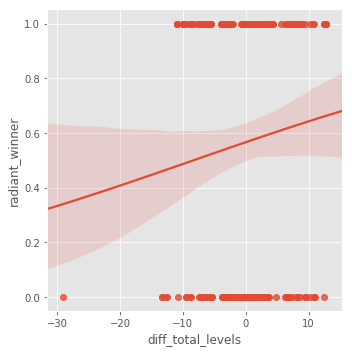

In [13]:
g = sns.lmplot(x="diff_total_levels", y="radiant_winner", data=df, logistic=True)

# Logistic Regression


In [14]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

train_predicted = lr.predict(X_train)
test_predicted = lr.predict(X_test)

lr_Train = accuracy_score(y_train, train_predicted)
lr_Test = accuracy_score(y_test, test_predicted)
print(lr_Train, lr_Test)
lr_prediction = dict()

lr_prediction['Logistic'] = lr.predict(X_test)

print('Accuracy: ',accuracy_score(y_test, lr_prediction['Logistic']))
print(lr.coef_)

conf_mat_logist = confusion_matrix(y_test, lr_prediction['Logistic'])
print(conf_mat_logist)


0.7183098591549296 0.5857142857142857
Accuracy:  0.5857142857142857
[[-4.22031299e-02  1.79365471e-03 -1.73747248e-02  5.37886558e-03
   9.73666601e-07  4.37284709e-05 -1.45853524e-01 -4.50790935e-03
   3.75366889e-03 -2.44848413e-01  1.85536586e-04  9.81053978e-03]]
[[16 18]
 [11 25]]


# K Nearest Neighbor Classifier

In [15]:
knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(X_train, y_train)

train_predicted = knn.predict(X_train)
test_predicted = knn.predict(X_test)

knn_Train = accuracy_score(y_train, train_predicted)
knn_Test = accuracy_score(y_test, test_predicted)
print(knn_Train, knn_Test)

knn_prediction = dict()

knn_prediction['Logistic'] = knn.predict(X_test)

print('Log: ',accuracy_score(y_test, knn_prediction['Logistic']))


knn_conf_mat_logist = confusion_matrix(y_test, knn_prediction['Logistic'])
print( knn_conf_mat_logist)


0.7112676056338029 0.5142857142857142
Log:  0.5142857142857142
[[12 22]
 [12 24]]


[0.5235930735930735, 0.48658008658008656, 0.6528138528138528, 0.595021645021645, 0.6188311688311688, 0.5993506493506493, 0.612987012987013, 0.6225108225108226, 0.6225108225108225, 0.5803030303030303, 0.5948051948051949, 0.5471861471861471, 0.595021645021645, 0.5709956709956711, 0.5709956709956711, 0.5805194805194805, 0.595021645021645, 0.6093073593073594, 0.5997835497835499, 0.5995670995670996, 0.6186147186147186, 0.5854978354978355, 0.6229437229437229, 0.6138528138528139, 0.6324675324675325, 0.6277056277056278, 0.6274891774891775, 0.6465367965367965, 0.6461038961038962, 0.6463203463203463]


Text(0,0.5,'Cross-Validated Accuracy')

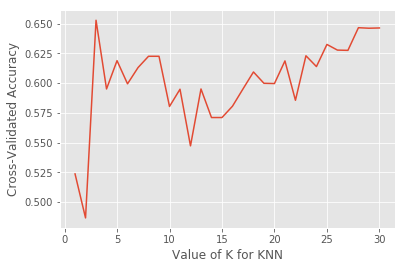

In [16]:
# Find Best Value for K

k_range = list(range(1, 31))
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

# Random Forest Classifier

In [17]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)

train_predicted = rf.predict(X_train)
test_predicted = rf.predict(X_test)

rf_Train = accuracy_score(y_train, train_predicted)
rf_Test = accuracy_score(y_test, test_predicted)
print(rf_Train, rf_Test)

rf_prediction = dict()

rf_prediction['Logistic'] = rf.predict(X_test)

print('Accuracy: ',accuracy_score(y_test, rf_prediction['Logistic']))


rf_conf_mat_logist = confusion_matrix(y_test, rf_prediction['Logistic'])
print(rf_conf_mat_logist)



0.9154929577464789 0.5571428571428572
Accuracy:  0.5571428571428572
[[15 19]
 [12 24]]


# Gradient Boosting Classifier

In [18]:
gdbc = GradientBoostingClassifier(random_state=1)
gdbc.fit(X_train, y_train)

train_predicted = gdbc.predict(X_train)
test_predicted = gdbc.predict(X_test)

gdbc_Train = accuracy_score(y_train, train_predicted)
gdbc_Test = accuracy_score(y_test, test_predicted)
print(gdbc_Train, gdbc_Test)

gdbc_prediction = dict()

gdbc_prediction['Logistic'] = gdbc.predict(X_test)

print('Accuracy: ',accuracy_score(y_test, gdbc_prediction['Logistic']))


gdbc_conf_mat_logist = confusion_matrix(y_test, gdbc_prediction['Logistic'])
print(gdbc_conf_mat_logist)



0.9225352112676056 0.6142857142857143
Accuracy:  0.6142857142857143
[[19 15]
 [12 24]]


# Cross Validation

In [29]:
estimators = [LogisticRegression(), RandomForestClassifier(), GradientBoostingClassifier(),KNeighborsClassifier(n_neighbors=16)]
scores = crossVal(estimators, X_train, y_train, k=10)
scores

array([[0.6       , 0.66666667, 0.73333333, 0.73333333],
       [0.73333333, 0.66666667, 0.66666667, 0.86666667],
       [0.85714286, 0.64285714, 0.78571429, 0.85714286],
       [0.85714286, 0.57142857, 0.5       , 0.64285714],
       [0.71428571, 0.57142857, 0.64285714, 0.71428571],
       [0.35714286, 0.57142857, 0.57142857, 0.64285714],
       [0.64285714, 0.57142857, 0.64285714, 0.71428571],
       [0.5       , 0.71428571, 0.57142857, 0.71428571],
       [0.57142857, 0.57142857, 0.5       , 0.57142857],
       [0.64285714, 0.57142857, 0.64285714, 0.57142857]])

In [20]:
np.mean(scores, axis=0)

array([0.6347619 , 0.57095238, 0.59238095, 0.65047619])

# Grid Search


In [21]:
rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [22]:
# Grid Search for best hyperparameters (Random Forest)
random_forest_grid = {'max_depth': [3,4,5,None],
                      'max_features': ['sqrt', 'log2', 'auto'],
                      'min_samples_leaf': [1, 2, 4, 8],
                       'n_estimators': [10, 20, 40, 80, 100], 'random_state':[1]}

rf_gridsearch = GridSearchCV(rf,
                             random_forest_grid,
                             n_jobs=-1,
                             verbose=True,
                             cv=5,
                             scoring='accuracy')

rf_gridsearch.fit(X_train, y_train)

print("best parameters:", rf_gridsearch.best_params_)

best_rf_model = rf_gridsearch.best_estimator_

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 1011 tasks      | elapsed:   14.0s


best parameters: {'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'n_estimators': 10, 'random_state': 1}


[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:   16.6s finished


In [23]:
# Grid Search for best hyperparameters (GradientBoostClassifier)
gradient_boost_grid = {'max_depth': [3,4,5,None],
                      'max_features': ['sqrt', 'log2', None],
                      'min_samples_leaf': [1, 2, 4, 8],
                       'n_estimators': [40, 80,100,200,400],'random_state':[1]}

gdbc_gridsearch = GridSearchCV(gdbc,
                             gradient_boost_grid,
                             n_jobs=-1,
                             verbose=True,
                             cv=5,
                             scoring='accuracy')

gdbc_gridsearch.fit(X_train, y_train)

print("best parameters:", gdbc_gridsearch.best_params_)

best_gdbc_model = gdbc_gridsearch.best_estimator_

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 876 tasks      | elapsed:   17.1s


best parameters: {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'n_estimators': 40, 'random_state': 1}


[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:   28.5s finished


# Optimized Random Forest and Boosting Models

In [24]:
best_rf = RandomForestClassifier(max_depth=5, max_features='sqrt',
                                min_samples_split=2, min_samples_leaf=4,
                                bootstrap=True, n_estimators=10,
                                n_jobs=-1, random_state=1)

best_rf.fit(X_train, y_train)

train_predicted = best_rf.predict(X_train)
test_predicted = best_rf.predict(X_test)
best_rf_train, best_rf_test =accuracy_score(y_train, train_predicted), accuracy_score(y_test, test_predicted)
print(f"Model: Best RandomForestClassifier\tTestCV\tAccuracy_train:{best_rf_train}\tAccuracy_test:{best_rf_test}")

Model: Best RandomForestClassifier	TestCV	Accuracy_train:0.823943661971831	Accuracy_test:0.6


In [31]:

best_gdbc = GradientBoostingClassifier(max_depth= None, max_features='sqrt',
                                        min_samples_leaf=2,
                                        n_estimators=200,
                                        random_state=1)
best_gdbc.fit(X_train, y_train)

# Call predict to get the predicted values for training and test set
train_predicted = best_gdbc.predict(X_train)
test_predicted = best_gdbc.predict(X_test)

# log-loss score calcs for training and test
best_gdbc_train = accuracy_score(y_train, train_predicted)
best_gdbc_test = accuracy_score(y_test, test_predicted)
print(f"Model: Best GradientBoostingClassifier\tTestCV\tAccuracy_train:{best_gdbc_train}\tAccuracy_test:{best_gdbc_test}")

Model: Best GradientBoostingClassifier	TestCV	Accuracy_train:0.9225352112676056	Accuracy_test:0.6285714285714286


Initial RF Score:    0.6349206349206349

Optimized RF Score:  0.626984126984127

Initial GDBC Score:  0.6428571428571429

Optimized GDBC Score:0.6587301587301587



# Feature Importance


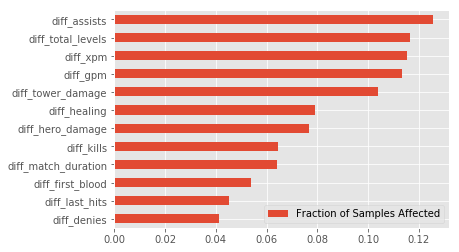

In [26]:
# Feature Importances(RF)
# Plot the feature importance
feat_scores = pd.DataFrame({'Fraction of Samples Affected' : rf.feature_importances_},
                           index=X_train.columns)
feat_scores = feat_scores.sort_values(by='Fraction of Samples Affected')
feat_scores.plot(kind='barh')

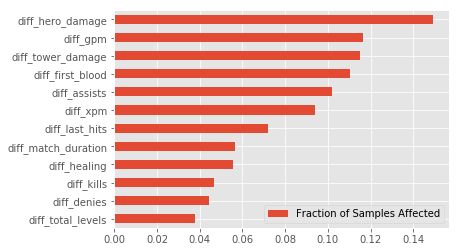

In [27]:
# Feature Importances(GB)
# Plot the feature importance
feat_scores = pd.DataFrame({'Fraction of Samples Affected' : gdbc.feature_importances_},
                           index=X_train.columns)
feat_scores = feat_scores.sort_values(by='Fraction of Samples Affected')
feat_scores.plot(kind='barh')

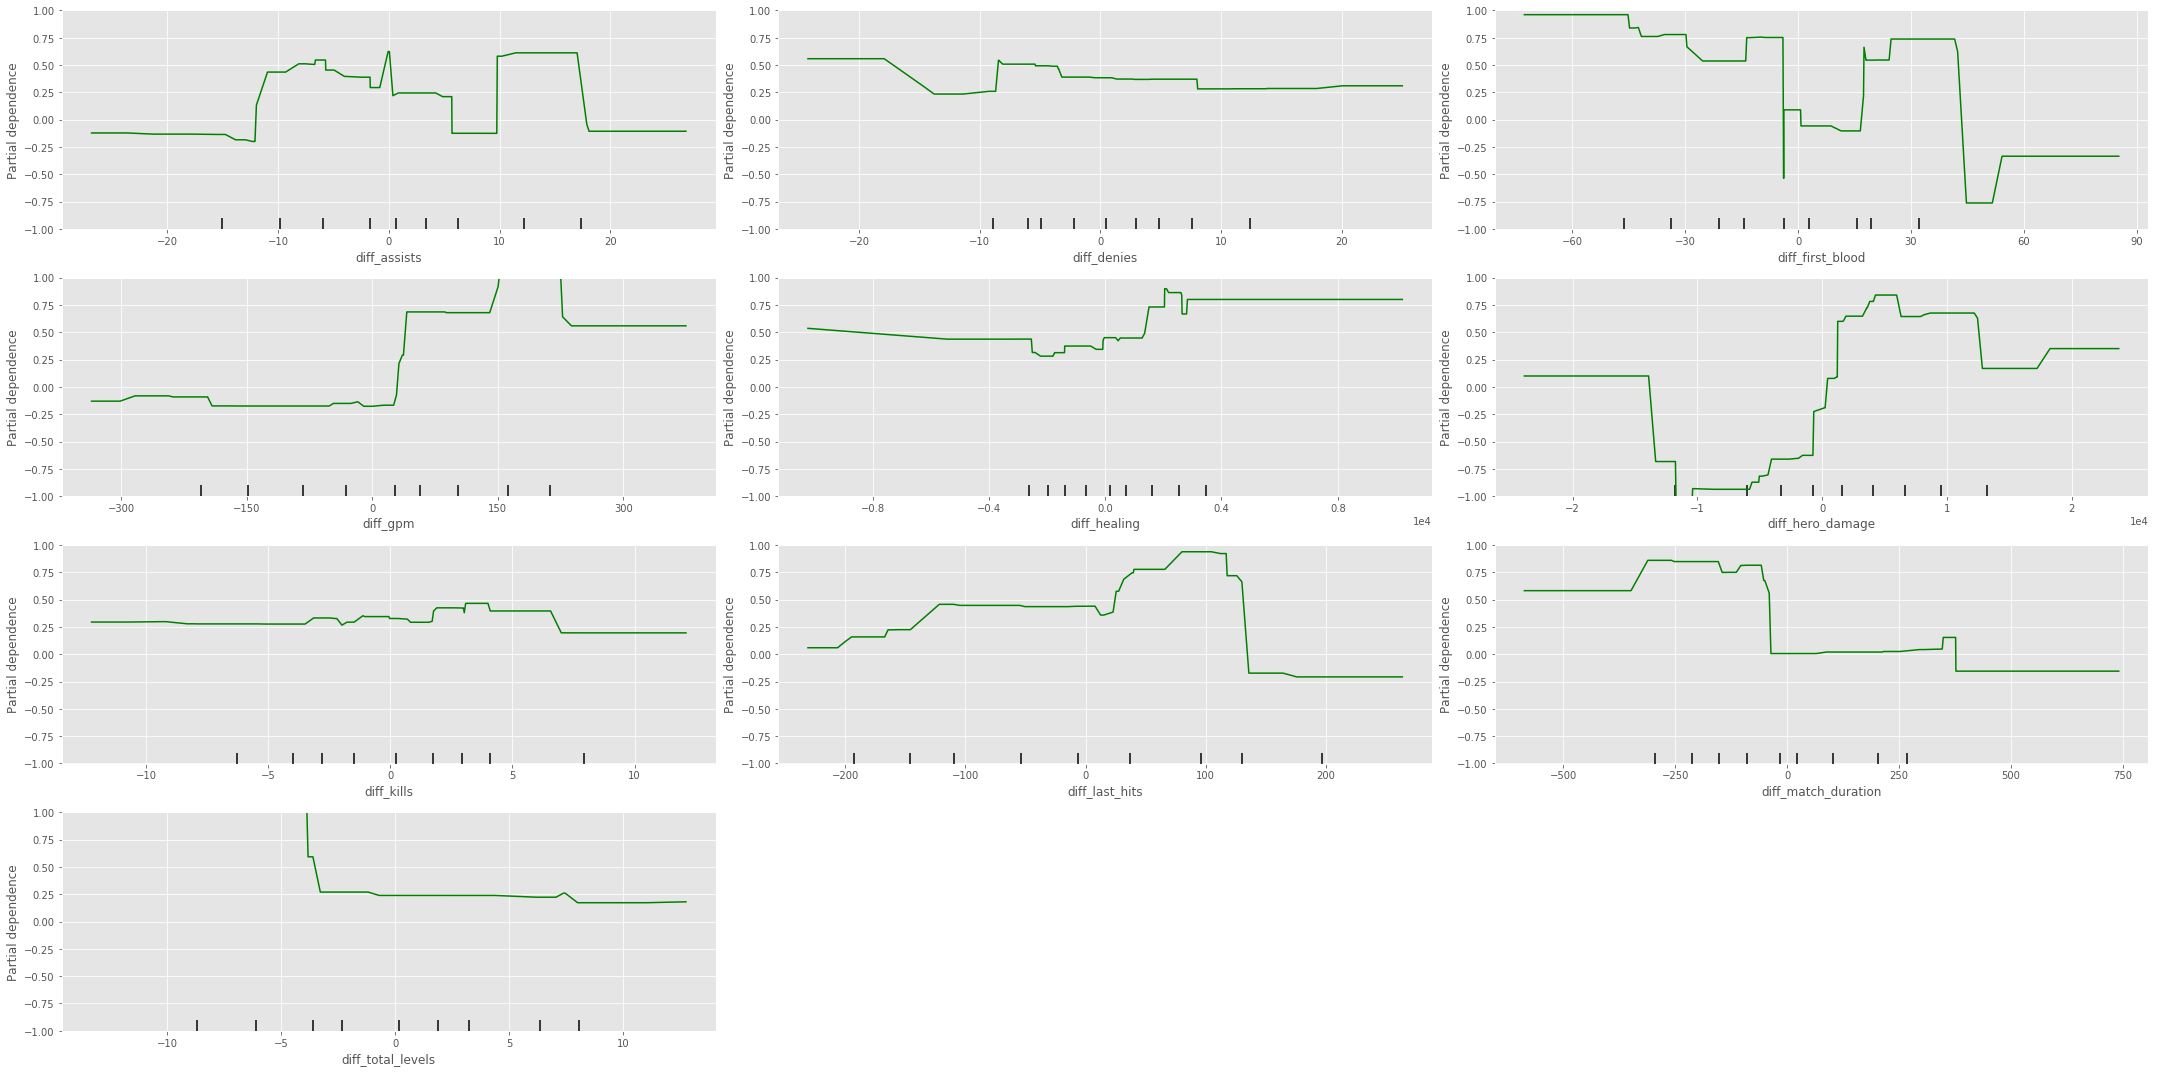

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.ensemble.partial_dependence import plot_partial_dependence

var_names = X_train.columns
features = list(range(X_train.shape[1]))
features = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

fig, axs = plot_partial_dependence(gdbc, X_train, features,
                                       feature_names=var_names,
                                       n_jobs=3, grid_resolution=250, figsize=(30, 15))
for ax in axs:
    ax.set_ylim([-1, 1])
fig.tight_layout()